# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Fransiscus Xaverius Ryan Prabowo]
- **Email:** [ryanprabowo25@gmail.com]
- **ID Dicoding:** [ryanprabowo]

## Menentukan Pertanyaan Bisnis

**Pertanyaan 1**


Apakah ada pola mengenai banyaknya sepeda yang dirental berdasarkan waktu per jam dalam satu minggu

---


**Pertanyaan 2**


Bagaimana tren sepeda yang dirental berdasarkan musim

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit babel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Mengimport dataset yang akan digunakan, yaitu day.csv dan hour.csv.
- Kedua data ini merupakan data rental sepeda. Data day.csv merupakan data rental sepeda per harinya, sedangkan data hour.csv merupakan data rental sepeda dalam waktu jam untuk setiap harinya.
- Kedua data ini memiliki rentang waktu dari 1 Januari 2011 hingga 31 Desember 2012.

---


Penjelasan variabel:
- instant $:=$ index data
- dte $:=$ tanggal
- season $:=$ musim dengan konversi 1 : semi, 2 : panas, 3 : gugur, 4 : dingin
- yr $:=$ tahun dengan konversi 0:2011, 1:2012
- mnth $:=$ bulan
- hr $:=$ jam dimulai dari 0 hingga 23
- holiday := hari libur
- weekday $:=$ hari dalam satu minggu dimulai dari 0 : Minggu hingga 6 : Sabtu
- workingday $:=$ 0 untuk akhir pekan dan 1 untuk hari kerja
- weathersit $:=$ cuaca 1 : cerah, 2 : berkabut, 3 : hujan ringan, 4 : hujan badai
- temp $:=$ temperatur dalam Celcius
- atemp $:=$ Hawa panas
- hum $:=$ kelembaban
- casual $:=$ banyaknya pelanggan tetap rental
- registered $:=$ banyaknya pelanggan baru rental
- cnt $:=$ banyaknya perental sepeda (gabungan dari casual dan registered)






### Assessing Data

#### Menilai data *day.csv*

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
df_day.duplicated().sum()

0

In [7]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data *hour.csv*

In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
df_hour.duplicated().sum()

0

In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value pada kedua data
- Tidak ada NaN pada kedua data
- Tidak ada duplikasi pada kedua data

---
Kedua dataset sudah siap digunakan karena tidak ada missing value, NaN, ataupun duplikasi pada kedua dataset


## Exploratory Data Analysis (EDA)

### Explore data *day.csv*

In [13]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
df_day['casual'].sum()

620017

In [19]:
df_day['registered'].sum()

2672662

In [20]:
df_day['cnt'].sum()

3292679

In [27]:
df_day['month'] = df_day['dteday'].dt.month

# Menghitung total pengguna casual dan registered per bulan
monthly_usage = df_day.groupby('month')[['casual', 'registered', 'cnt']].sum()

# Menghitung total untuk masing-masing kategori
total = monthly_usage.sum().to_frame().T  # Transpose agar menjadi satu baris

# Menambahkan label untuk total
total.index = ['Total']

# Menggabungkan total dengan monthly_usage
monthly_usage_with_total = pd.concat([monthly_usage, total])

# Menampilkan hasil
print(monthly_usage_with_total)

       casual  registered      cnt
1       12042      122891   134933
2       14963      136389   151352
3       44444      184476   228920
4       60802      208292   269094
5       75285      256401   331686
6       73906      272436   346342
7       78157      266791   344948
8       72039      279155   351194
9       70323      275668   345991
10      59760      262592   322352
11      36603      218228   254831
12      21693      189343   211036
Total  620017     2672662  3292679


In [26]:
season_usage = df_day.groupby('season')[['casual', 'registered', 'cnt']].sum()

# Menghitung total untuk masing-masing kategori
total = season_usage.sum().to_frame().T  # Transpose agar menjadi satu baris

# Menambahkan label untuk total
total.index = ['Total']

# Menggabungkan total dengan season_usage
season_usage_with_total = pd.concat([season_usage, total])

# Menampilkan hasil
print(season_usage_with_total)

       casual  registered      cnt
1       60622      410726   471348
2      203522      715067   918589
3      226091      835038  1061129
4      129782      711831   841613
Total  620017     2672662  3292679


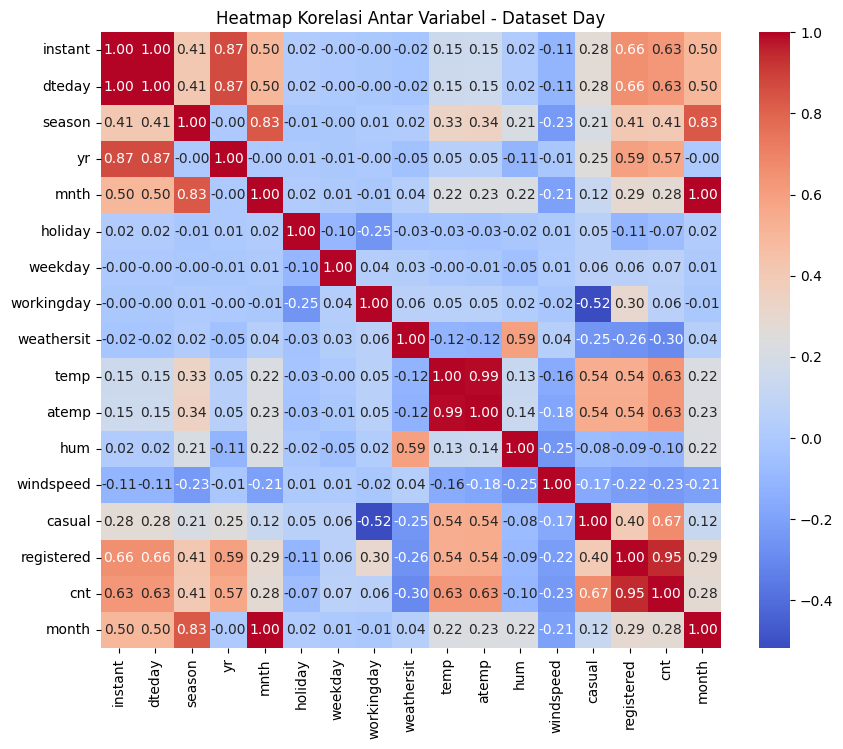

In [22]:
# Menghitung korelasi antar variabel di df_day
corr_day = df_day.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_day, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel - Dataset Day')
plt.show()



**Insight:**
- Dari keseluruhan pelanggan sepeda, pelanggan baru lebih banyak dari pelanggan tetap dalam waktu bulanan.
- Heatmap ini menunjukkan korelasi antar variabel. Semakin menuju warna merah gelap, maka korelasi semakin tinggi, artinya pengaruhnya semakin besar, sedangkan semakin menuju warna biru gelap maka korelasi semakin rendah, yang memiliki arti pengaruhnya semakin kecil.
- Keseluruhan perental sepeda (cnt) memiliki korelasi yang cukup tinggi dengan musim, yang artinya musim memiliki pengaruh dengan banyaknya perental sepeda.
- Banyaknya perental sepeda dengan tanggal memiliki korelasi yang cukup tinggi, artinya tanggal memengaruhi banyaknya perental sepeda.

### Explore data *hour.csv*

In [24]:
df_hour['month'] = df_hour['dteday'].dt.month

# Menghitung total pengguna casual dan registered per bulan
monthly_use = df_hour.groupby('month')[['casual', 'registered', 'cnt']].sum()

# Menghitung total untuk masing-masing kategori
Total = monthly_use.sum().to_frame().T  # Transpose agar menjadi satu baris

# Menggabungkan total dengan monthly_usage
monthly_use_total = pd.concat([monthly_use, total])

# Menampilkan hasil
print(monthly_use_total)

    casual  registered      cnt
1    12042      122891   134933
2    14963      136389   151352
3    44444      184476   228920
4    60802      208292   269094
5    75285      256401   331686
6    73906      272436   346342
7    78157      266791   344948
8    72039      279155   351194
9    70323      275668   345991
10   59760      262592   322352
11   36603      218228   254831
12   21693      189343   211036
0   620017     2672662  3292679


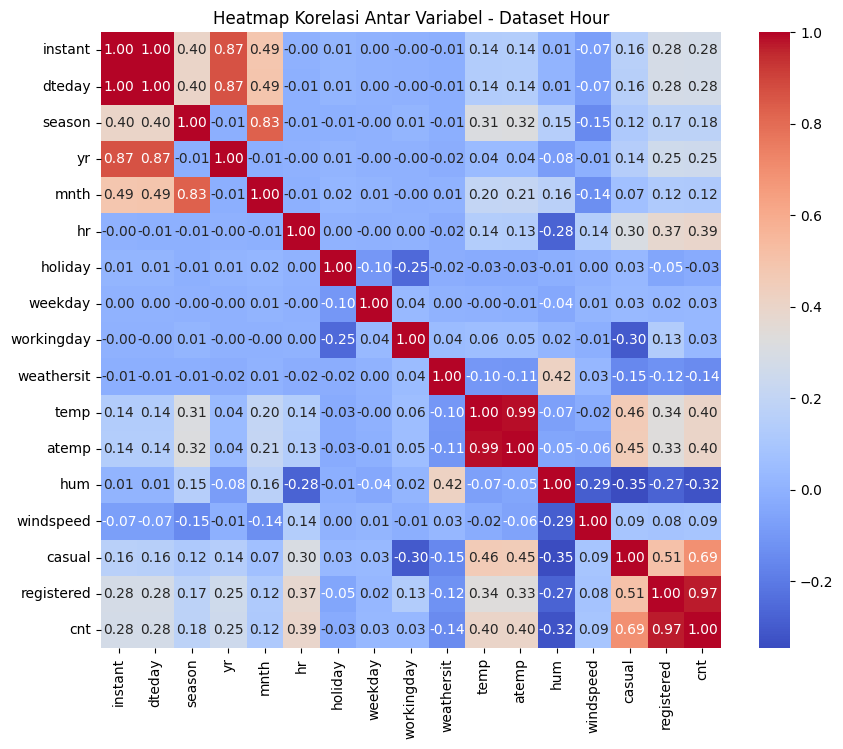

In [23]:
# Menghitung korelasi antar variabel di df_hour
corr_hour = df_hour.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_hour, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel - Dataset Hour')
plt.show()

**Insight:**
- Terdapat keselarasan banyaknya perental sepeda dalam waktu bulanan terhadap data *day.csv* yang menandakan bahwa tidak ada masalah pada nilai data yang akan digunakan.
- Banyaknya perental sepeda dengan waktu per jam memiliki korelasi yang cukup tinggi, artinya waktu per jam cukup memengaruhi banyaknya perental sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:

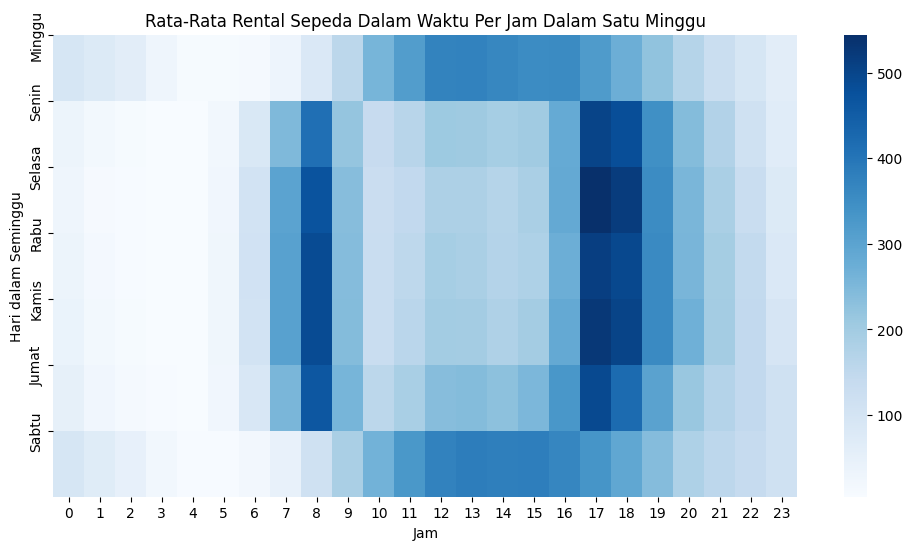

In [29]:
plt.figure(figsize=(12, 6))

# Menghitung rata-rata penggunaan sepeda berdasarkan hari dalam seminggu dan jam
heatmap_data = df_hour.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')

# Membuat heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=False)
plt.title('Rata-Rata Rental Sepeda Dalam Waktu Per Jam Dalam Satu Minggu')
plt.xlabel('Jam')
plt.ylabel('Hari dalam Seminggu')
plt.xticks(rotation=0)
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

**Insight:**
- Heatmap tersebut korelasi antara rata-rata rental sepeda (rata-rata cnt) dengan waktu per jam dalam satu minggu.
- Semakin gelap warnanya, maka semakin kuat korelasinya. Pada kasus ini semakin gelap warnanya, maka semakin banyak orang yang merental sepeda pada jam dan hari tertentu.
- Sebagai contoh, pada hari Selasa jam 17 warna pada heatmap sangat gelap. Artinya pada hari tersebut banyak orang yang merental sepeda, sedangkan pada hari Selasa pukul 0, warnanya sangat terang. Artinya pada hari dan jam tersebut sangat sedikit atau bahkan tidak ada orang yang merental sepeda.

### Pertanyaan 2:

<ipython-input-43-a16f00fd209d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='casual', data=season_summary, palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

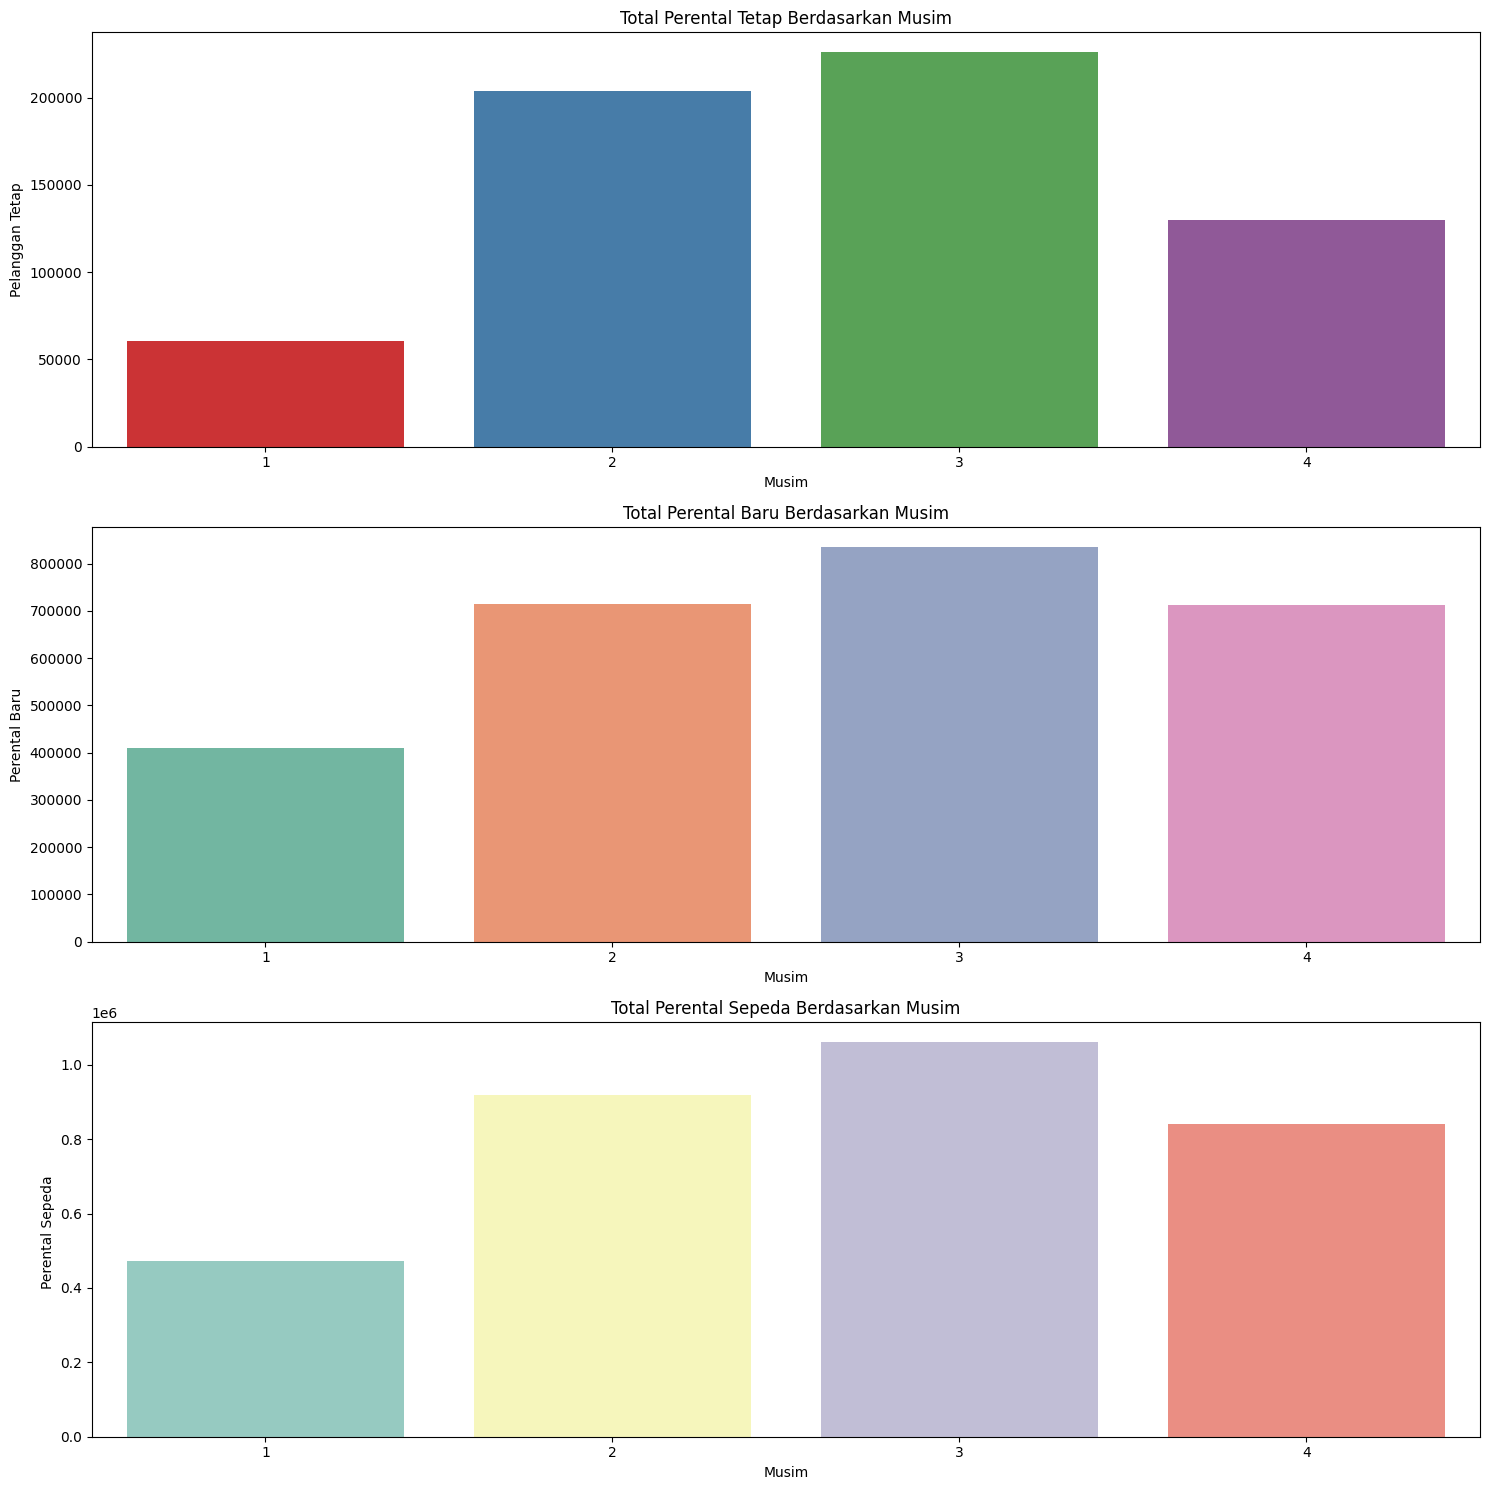

In [43]:
season_summary = df_day.groupby('season')[['casual', 'registered', 'cnt']].sum().reset_index()

# Set ukuran gambar untuk semua plot
plt.figure(figsize=(15, 15))

# Bar Chart untuk Casual
plt.subplot(3, 1, 1)  # 3 baris, 1 kolom, subplot ke-1
sns.barplot(x='season', y='casual', data=season_summary, palette='Set1')
plt.title('Total Perental Tetap Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Pelanggan Tetap')

# Bar Chart untuk Registered
plt.subplot(3, 1, 2)  # 3 baris, 1 kolom, subplot ke-2
sns.barplot(x='season', y='registered', data=season_summary, palette='Set2')
plt.title('Total Perental Baru Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Perental Baru')

# Bar Chart untuk Count
plt.subplot(3, 1, 3)  # 3 baris, 1 kolom, subplot ke-3
sns.barplot(x='season', y='cnt', data=season_summary, palette='Set3')
plt.title('Total Perental Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Perental Sepeda ')

# Atur layout agar tidak overlap
plt.tight_layout()
plt.show()

**Insight:**
- Barchart pertama menunjukkan total perental tetap berdasarkan musim. Pada barchart ini total perental tetap paling tinggi ada di musim gugur, sedangkan yang paling rendah ada di musim semi.
- Barchart kedua menunjukkan total perental baru berdasarkan musim. Pada barchart ini total perental baru paling tinggi berada di musim gugur juga, sedangkan yang paling rendah masih ditempati musim semi, meskipun perental baru lebih banyak dibandingkan perental tetap.
- Barchart ketiga menunjukkan total seluruh perental berdasarkan musim.

## Analisis Lanjutan (Opsional)

Selanjutnya dilakukan pengelompokkan (*Clustering*) dengan membagi waktu menjadi empat bagian, yaitu pagi, siang, siang, sore, dan malam.

---
Pembagian waktu:
- Pagi  $:=$ Jam 0 sampai dengan Jam 10
- Siang $:=$ Jam 10 sampai dengan jam 15
- Sore  $:=$ Jam 15 sampai dengan jam 18
- Malam $:=$ Jam 18 sampai dengan jam 0


<ipython-input-46-5a93bb297abd>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_analysis = df_hour.groupby(['time_cluster', 'day_cluster'])['cnt'].mean().reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/pyt

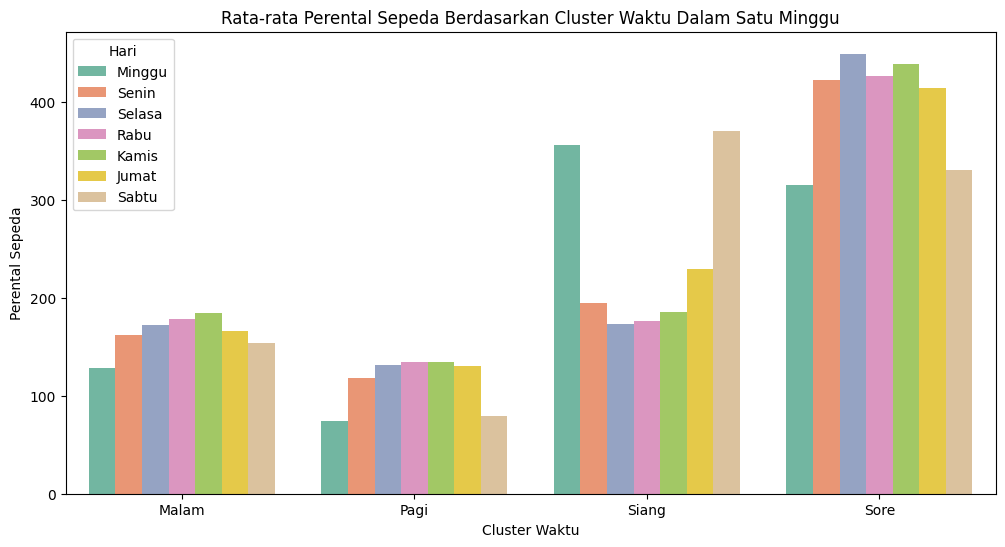

In [46]:
# Fungsi untuk mengelompokkan waktu berdasarkan jam
def assign_time_cluster(hour):
    if 0 < hour <= 10:
        return 'Pagi'
    elif 10 < hour <= 15:
        return 'Siang'
    elif 15 < hour <= 18:
        return 'Sore'
    else:
        return 'Malam'

# Terapkan fungsi untuk clustering waktu
df_hour['time_cluster'] = df_hour['hr'].apply(assign_time_cluster)

# Mapping 'weekday' menjadi nama hari dalam seminggu
weekday_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
df_hour['day_cluster'] = df_hour['weekday'].map(weekday_mapping)

# Mengatur urutan kategori hari
day_order = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
df_hour['day_cluster'] = pd.Categorical(df_hour['day_cluster'], categories=day_order, ordered=True)

# Menghitung rata-rata penggunaan sepeda di setiap kluster waktu dan hari
cluster_analysis = df_hour.groupby(['time_cluster', 'day_cluster'])['cnt'].mean().reset_index()

# Visualisasi: Bar Plot untuk Penggunaan Sepeda Berdasarkan Kluster Waktu dan Hari
plt.figure(figsize=(12, 6))
sns.barplot(x='time_cluster', y='cnt', hue='day_cluster', data=cluster_analysis, palette='Set2')
plt.title('Rata-rata Perental Sepeda Berdasarkan Cluster Waktu Dalam Satu Minggu')
plt.xlabel('Cluster Waktu')
plt.ylabel('Perental Sepeda')

# Memindahkan legenda ke kiri atas dan biarkan warna otomatis sesuai
plt.legend(title='Hari', loc='upper left')
plt.show()

**Insight:**
- Berdasarkan barchart, rata-rata perental yang paling sedikit adalah di pagi hari, sedangkan rata-rata perental paling tinggi adalah di sore hari.
-  Perhatikan bar pada pada hari sabtu dan minggu. Pada siang hari diakhir pekan dapat terlihat bahwa rata-rata perental cukup tinggi dibandingkan rata-rata perental pada sore hari. Hal ini menandakan bahwa pada akhir pekan, lebih banyak orang merental sepeda pada siang hari dibandingkan dengan sore hari untuk hari sabtu dan minggu.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


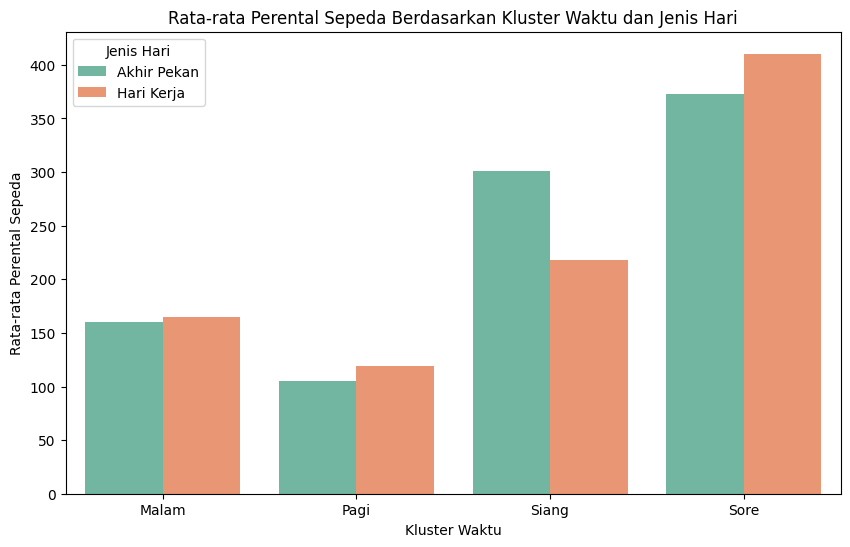

In [48]:
# Terapkan fungsi untuk clustering waktu
df_hour['time_cluster'] = df_hour['hr'].apply(assign_time_cluster)

# Membuat kolom 'day_cluster' berdasarkan hari dalam seminggu
df_hour['day_cluster'] = df_hour['weekday'].apply(lambda x: 'Hari Kerja' if x < 5 else 'Akhir Pekan')

# ------------------------------------------------------------------------
# Analisis dan Visualisasi Penggunaan Sepeda Berdasarkan Cluster
# ------------------------------------------------------------------------

# Menghitung rata-rata penggunaan sepeda di setiap kluster waktu dan hari
cluster_analysis = df_hour.groupby(['time_cluster', 'day_cluster'])['cnt'].mean().reset_index()

# Visualisasi: Bar Plot untuk Penggunaan Sepeda Berdasarkan Kluster Waktu dan Hari
plt.figure(figsize=(10, 6))
sns.barplot(x='time_cluster', y='cnt', hue='day_cluster', data=cluster_analysis, palette='Set2')
plt.title('Rata-rata Perental Sepeda Berdasarkan Kluster Waktu dan Jenis Hari')
plt.xlabel('Kluster Waktu')
plt.ylabel('Rata-rata Perental Sepeda')
plt.legend(title='Jenis Hari', loc='upper left')
plt.show()


**Insight:**


Terdapat keselarasan terhadap klustering sebelumnya, seperti:
- Rata-rata perental terendah adalah di pagi hari, sedangkan yang paling tinggi adalah di sore hari.
- Pada siang hari diakhir pekan rata-rata perental sepeda lebih banyak dibandingkan dengan sore hari diakhir pekan, meskipun secara keseluruhan rata-rata paling tinggi adalah di sore hari.

## Conclusion

**Kesimpulan pertanyaan 1**


Terdapat pola banyaknya perental sepeda terhadap waktu jam dalam satu harinya. Pola ini terlihat dengan jelas bahwa pada jam 0 sampai dengan jam 10 (pagi) rata-rata perental sepeda sangatlah rendah, lalu peringkat ketiga dengan rata-rata perental terendah adalah jam 18 sampai dengan jam 0, peringkat kedua adalah jam 10 sampai dengan jam 15, dan yang rata-rata perental tertinggi adalah jam 15 sampai dengan jam 18. Meskipun demikian, melalui visualisasi heatmap, dan klustering, dapat terlihat bahwa rata-rata perental pada jam 10 sampai dengan jam 15 di akhir pekan lebih banyak dibandingkan rata-rata perental pada jam 15 sampai dengan jam 18 di akhir pekan.



Berdasarkan analisis ini, pada jam 15 sampai dengan jam 18 merupakan waktu yang memiliki rata-rata perental sepeda paling tinggi, artinya banyak orang akan merental sepeda pada waktu tersebut, dan khusus di akhir pekan, rata-rata pada jam 10 sampai dengan 15 juga cukup tinggi, artinya pada akahir pekan banyak orang akan merental sepeda pada waktu ini.

---





**Kesimpulan pertanyaan 2**

Musim gugur memiliki total perental paling tinggi diantara musim lainnya, baik perental tetap ataupun perental baru, sedangkan musim semi memiliki total perental paling rendah diantara musim lainnya. Perental baru memiliki total yang lebih tinggi dibandingkan dengan perental tetap untuk semua musim.


Berdasarkan analisis ini, perental sepeda akan banyak datang pada musim gugur dan sedikit saat musim semi, selain itu kebanyakan dari perental sepeda yang datang merupakan perental baru.

